In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
leads = pd.read_csv('Leads.csv')

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Basic Analysis

In [4]:
leads.shape

(9240, 37)

#### There are total of 9240 rows of data with 37 columns

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### With all the statistics from the numeric columns we see quite a lot variance as well as null values

## Data Cleaning

#### There are various types of data types and all seems to be in correct format. But looks like there are some null values as well based on the total data count as 9240

Let's calculate the percentage of null values in the dataset

In [7]:
def calculate_null_percentage(dataset):
    return round(dataset.isnull().sum() / len(dataset) * 100, 2)

In [8]:
calculate_null_percentage(leads)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Also as mentioned in the problem statement, "Select" is considered to be as `null`. This is because if the data was collected from an user interface, there could have been several options as A, B, C and 'Select'. If the data entry operator or user did not choose any of the valid options it would remain as 'Select'. This implies that "Select" is same as `null` in the dataset.

Let's replace `Select` with null and re-calculate the `null` values percentage.

In [9]:
leads = leads.replace('Select', np.nan)

In [10]:
calculate_null_percentage(leads)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### There is a significant increse from `29.32%` to `74.19%` in the `Lead Profile` column after replacing all the `Select` values.

According to general guideline all columns which has more than **`40%`** of missing values should be dropped as they won't impact on the analysis any significantly.
Let's see what does these columns contain in actual.

In [11]:
columns_with_high_missing_values = ["How did you hear about X Education", 
                                    "Lead Quality", 
                                    "Lead Profile", 
                                    "Asymmetrique Activity Index", 
                                    "Asymmetrique Profile Index", 
                                    "Asymmetrique Activity Score", 
                                    "Asymmetrique Profile Score"]

In [12]:
leads[columns_with_high_missing_values]

,How did you hear about X Education,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score
0,NaN,Low in Relevance,NaN,02.Medium,02.Medium,15.0,15.0
1,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0
2,NaN,Might be,Potential Lead,02.Medium,01.High,14.0,20.0
3,Word Of Mouth,Not Sure,NaN,02.Medium,01.High,13.0,17.0
4,Other,Might be,NaN,02.Medium,01.High,15.0,18.0
...,...,...,...,...,...,...,...
9235,NaN,High in Relevance,Potential Lead,02.Medium,01.High,15.0,17.0
9236,NaN,Might be,Potential Lead,02.Medium,01.High,14.0,19.0
9237,NaN,Not Sure,Potential Lead,02.Medium,01.High,13.0,20.0
9238,Online Search,NaN,NaN,02.Medium,02.Medium,15.0,16.0


#### Although these columns seems to have an impact on the case study as they have some kind of score, but due to high percentage of missing values, these columns need to be dropped from the dataset

In [13]:
leads = leads.drop(columns = columns_with_high_missing_values)

In [14]:
leads.shape

(9240, 30)

In [15]:
calculate_null_percentage(leads)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Specialization, Tags and City has close to `40%` missing values but we should not drop them as they might have impact on the overall analysis

In [16]:
leads.Specialization.value_counts() / len(leads) * 100

Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### Let's fill the null values with a columns called `Other`

In [17]:
leads.Specialization = leads.Specialization.fillna('Other')

#### Recalculating the Specialization values

In [18]:
leads.Specialization.value_counts() / len(leads) * 100

Other                                36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### Let's apply the same for Tags columns

In [19]:
leads.Tags.value_counts() / len(leads) * 100

Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

Tags column has most values as "Will revert after reading the email" i.e. **58.7%**. So, all the missing columns can be filled with the same value.

In [20]:
leads.Tags = leads.Tags.fillna('Will revert after reading the email')

In [21]:
leads.Tags.value_counts() / len(leads) * 100

Will revert after reading the email                  58.712121
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0.357143
number not provided                                   0

#### Let's look into the City columns

In [22]:
leads.City.value_counts() / len(leads) * 100

Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

#### As we do not have enough information on the City we can fill the missing City information as **Mumbai** (Which is already present in the dataset) and has the majority in count. We could have filled with "Other Cities" as well here.

In [23]:
leads.City = leads.City.fillna('Mumbai')

In [24]:
calculate_null_percentage(leads)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Country column has **`26.63%`** missing values.

In [25]:
leads.Country.value_counts() / len(leads) * 100

India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

Most mentioned country is India. Missing values could be filled with India. 

In [26]:
leads.Country = leads.Country.fillna('India')

In [27]:
leads.Country.value_counts() / len(leads) * 100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switzerland   

#### "What is your current occupation" column has some missing values. Let's impute this.

In [28]:
leads['What is your current occupation'].value_counts() / len(leads) * 100

Unemployed              60.606061
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

Majority of the leads are unemployed here. It might be not appropriate to fill the missing data with `Unemployed`. It could be filled with `Other` as well. Business domain-wise and Unemployed person would(propably) tend to choose a course for employment. So all the missing values could be better filled with `Unemployed` column.

In [29]:
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Unemployed')

In [30]:
leads['What is your current occupation'].value_counts() / len(leads) * 100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

#### "What matters most to you in choosing a course" column has good number of missing values. Let's impute that too

In [31]:
leads['What matters most to you in choosing a course'].value_counts() / len(leads) * 100

Better Career Prospects      70.649351
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

Very simple choice here to fill the missing values with "Better Career Prospects".

In [32]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [33]:
leads['What matters most to you in choosing a course'].value_counts() / len(leads) * 100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [34]:
calculate_null_percentage(leads)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

#### Rest of the missing values columns are less then `1.5%`. These rows will be dropped.

In [35]:
leads.dropna(inplace=True)

In [36]:
calculate_null_percentage(leads)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

#### As we see there are no more null values in the dataset. We can proceed for data analysis for better understanding of the dataset and features.

## Exploratory Data Analysis

#### Let's find out the conversion rate as convert is the target variable.

In [37]:
sum(leads.Converted) / len(leads) * 100

37.85541106458012

#### So, the conversion rate is very close to `38%`

Let's find out relation among leads origin and lead source with the conversions.

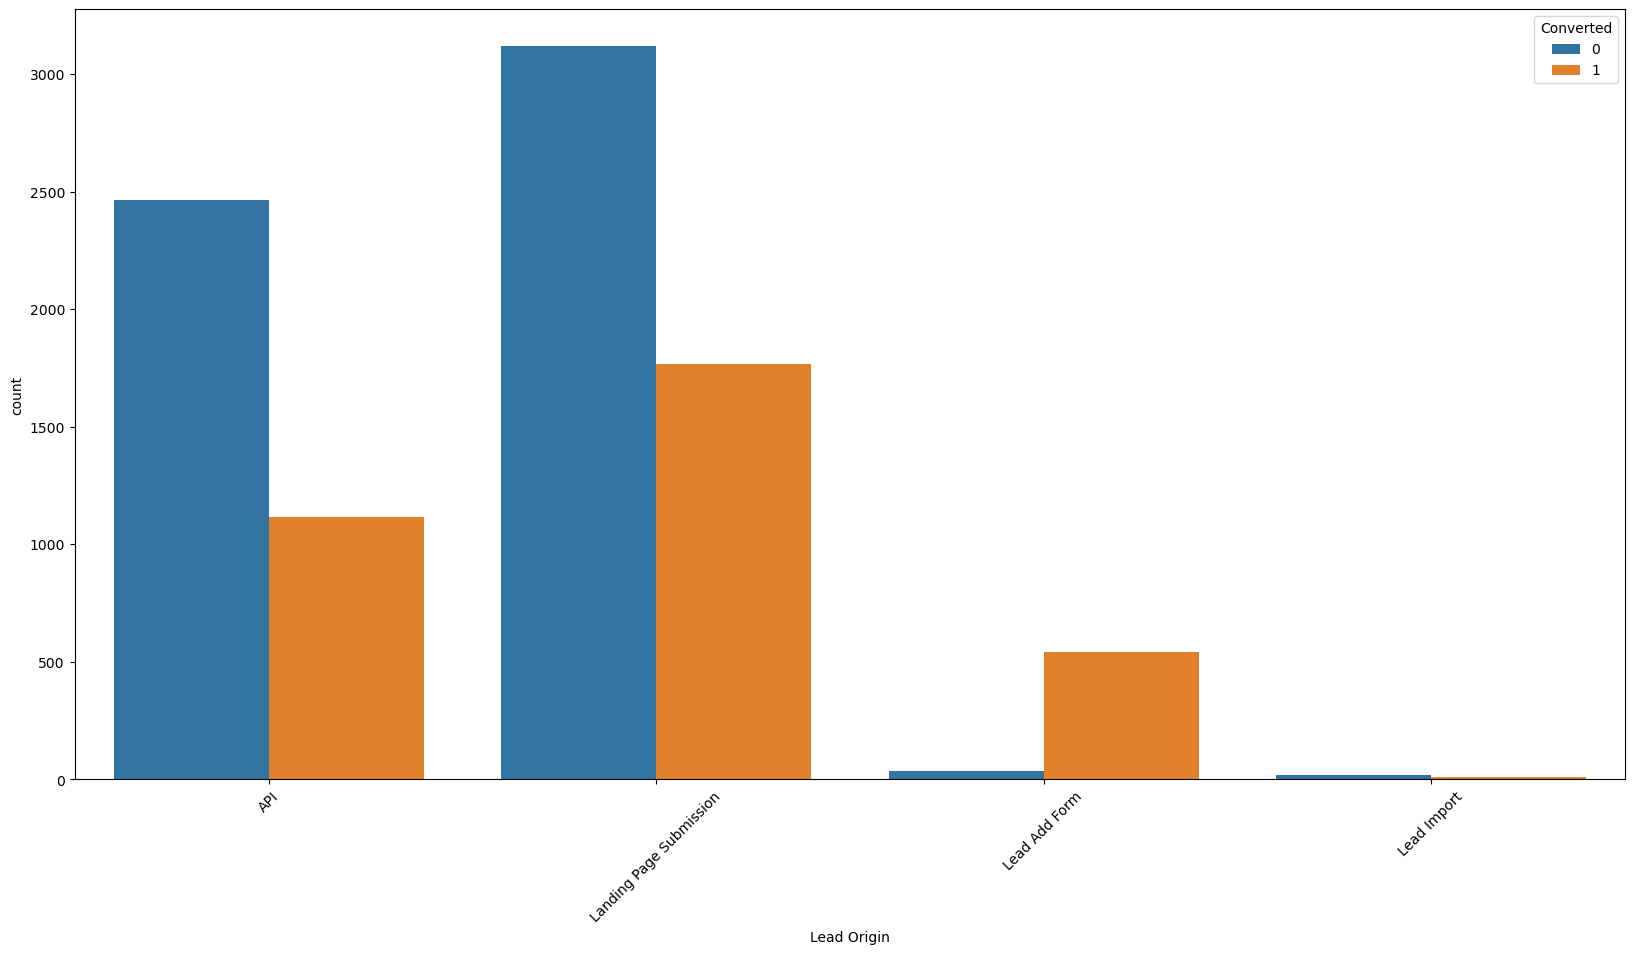

In [38]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'Lead Origin', hue = 'Converted')
plt.xticks(rotation = 45)
plt.show()

#### Observations
1. API and Landing Page Submission have more conversion rate
2. Lead Add Form has the highest coversion rate compared to the other two
3. Lead Import has a very minimal conversion rate

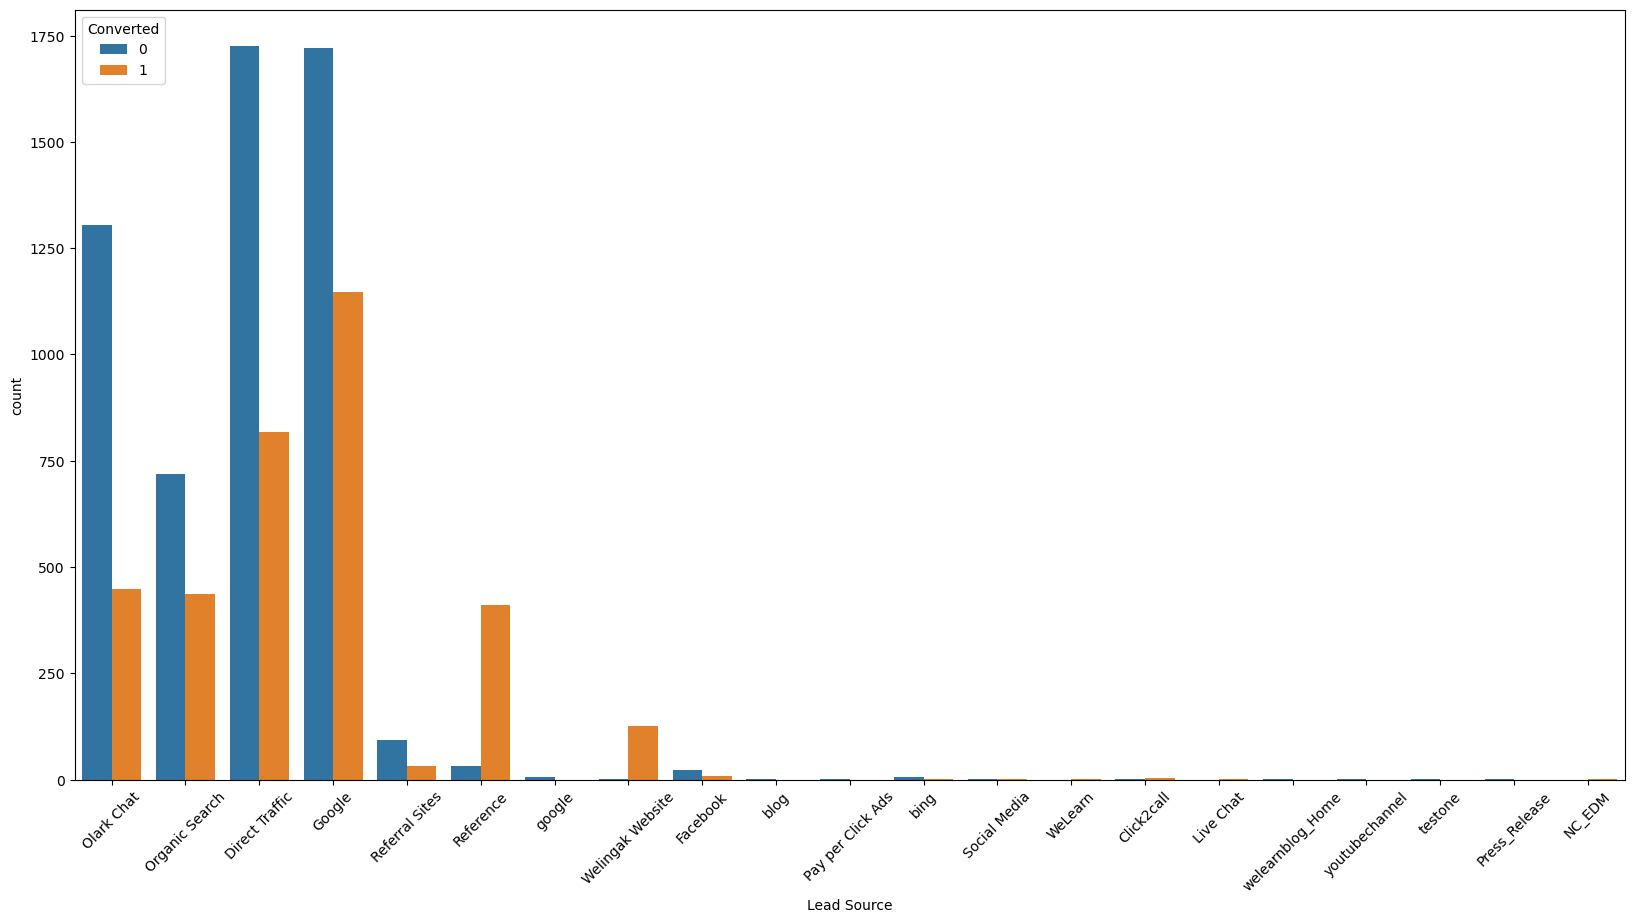

In [39]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'Lead Source', hue = 'Converted')
plt.xticks(rotation = 45)
plt.show()

#### Observations
1. Olark Chat, Organic Search Direct Traffic, Google and Reference have more conversion rate
2. There are Google and google both - we need to convert them to single category
3. Also there are many **other** categories with minimal reach and conversions - we can convert them to a other category here

In [40]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [41]:
# Replacing google with Google
leads['Lead Source'].replace("google", "Google", inplace = True)

In [42]:
# Replacing Click2call, Press_Release, Social Media, 
# Live Chat, youtubechannel, testone, Pay per Click Ads, 
# welearnblog_Home, WeLearn, blog, NC_EDM
# to 'Others'

leads['Lead Source'].replace(['Click2call', 'Press_Release', 'Social Media', 'Live Chat', 
              'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home', 
              'WeLearn', 'blog', 'NC_EDM'], "Others", inplace = True)

In [43]:
leads['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                17
bing                   6
Name: Lead Source, dtype: int64

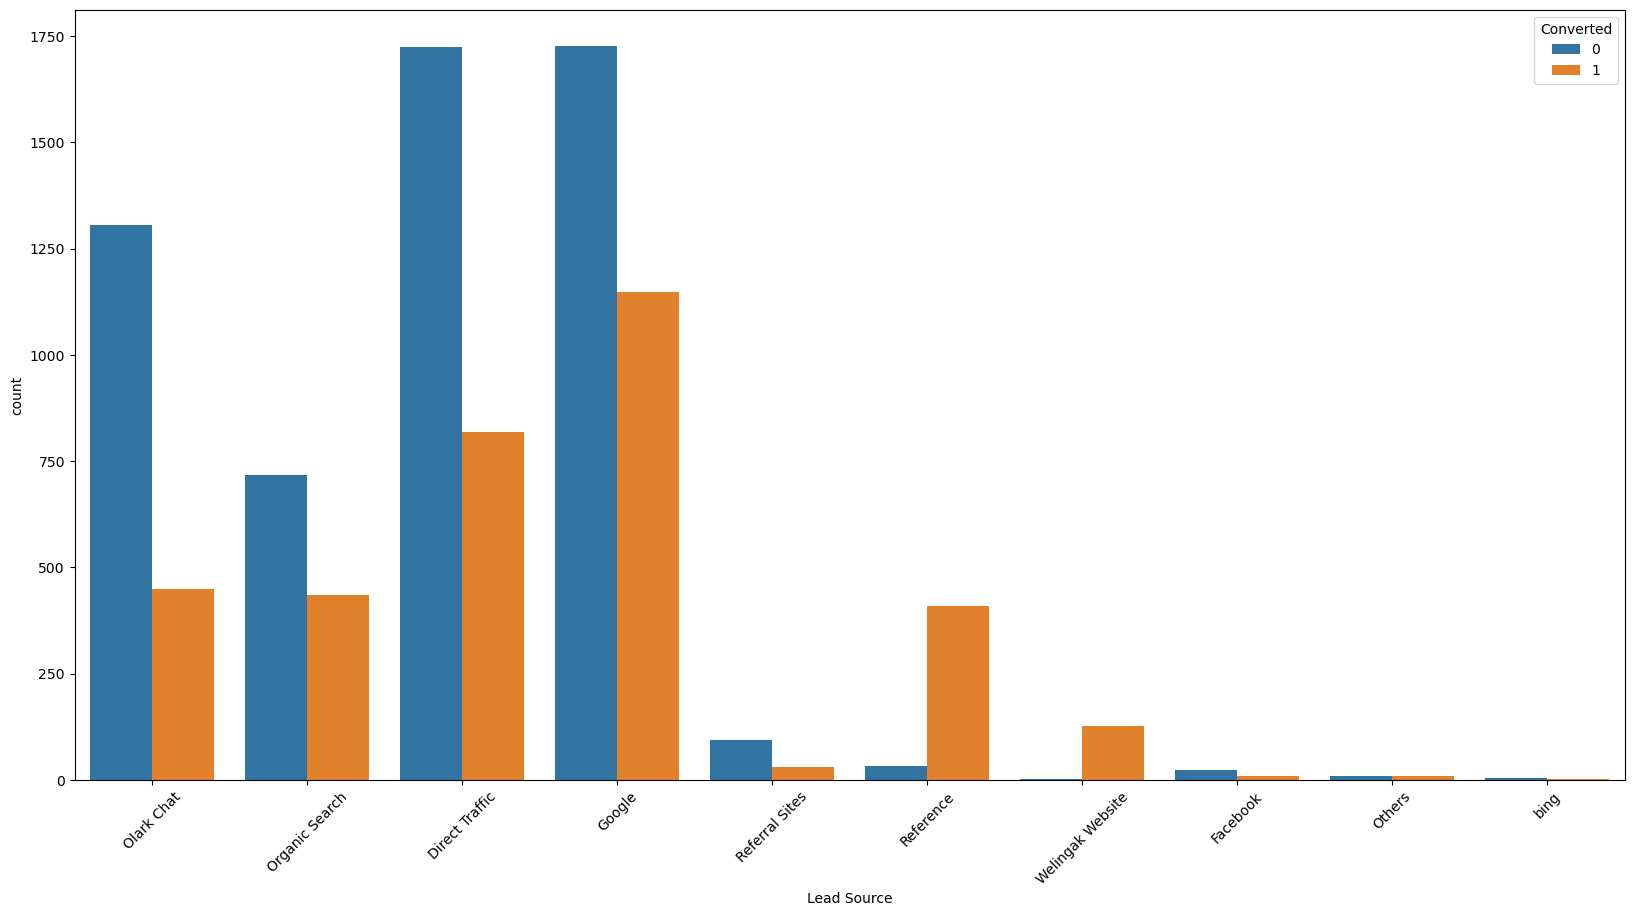

In [44]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'Lead Source', hue = 'Converted')
plt.xticks(rotation = 45)
plt.show()

#### Observations -
1. Google and Direct Traffic conversion rates are high in numbers
2. Reference and Welingak website has the highest conversion rate in terms of percentage

More focus should be on Google traffic, reference and Welingak website, nurturing these sources might increase conversion rate by a good margin

Let's see 'Do Not Email' and 'Do Not Call' columns based on the conversion rate

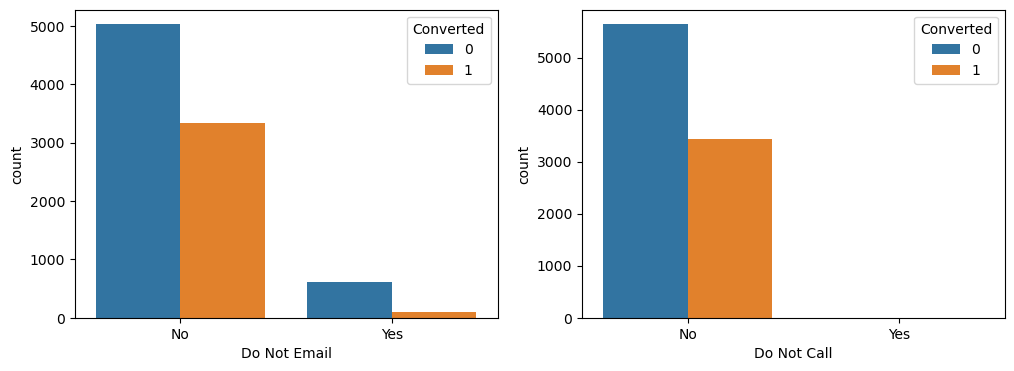

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data = leads, x = 'Do Not Email', hue = 'Converted', ax=axs[0])
sns.countplot(data = leads, x = 'Do Not Call', hue = 'Converted', ax=axs[1])
plt.show()

#### Observations -
1. Condidates who allowed emails and calls communication has more convertion rate.
2. In case of 'Do Not Email' and 'Do Not Call' - 'NO' - conversion rates are similar
3. It can be inferred that interested candidates allowed calls and emails

Let's analyse 'TotalVisits'

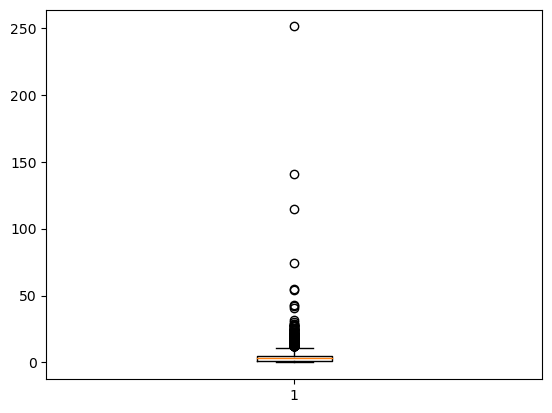

In [46]:
plt.boxplot(data=leads, x='TotalVisits')
plt.show()

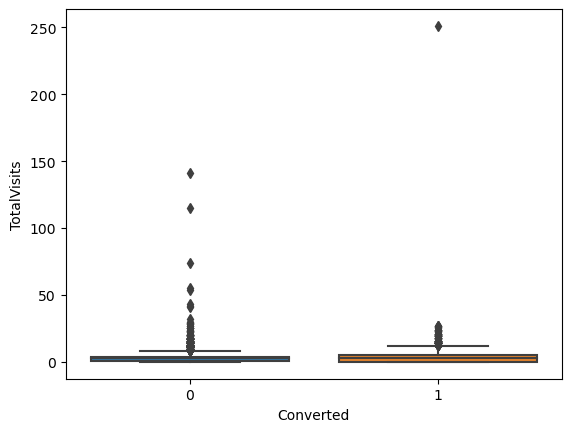

In [47]:
sns.boxplot(data=leads, x="Converted", y='TotalVisits')
plt.show()

As we see there are many outliers in the totalvisits column based on the target columns. Let's consider 99th percentile to see if the outliers are removed. We will be updating the values to 99th percentile values here.

In [48]:
quantile = leads.TotalVisits.quantile([0.05, 0.99]).values
leads.TotalVisits[leads.TotalVisits <= quantile[0]] = quantile[0]
leads.TotalVisits[leads.TotalVisits >= quantile[1]] = quantile[1]

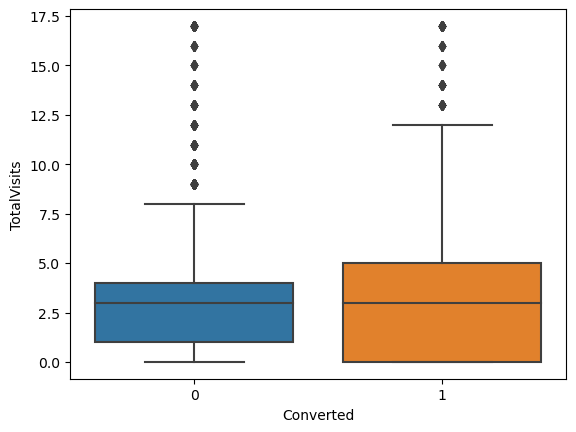

In [49]:
sns.boxplot(data=leads, x="Converted", y='TotalVisits')
plt.show()

We can still see a good amount of outliers, it's will be better to take 95th percentile.

In [50]:
quantile = leads.TotalVisits.quantile([0.05, 0.95]).values
leads.TotalVisits[leads.TotalVisits <= quantile[0]] = quantile[0]
leads.TotalVisits[leads.TotalVisits >= quantile[1]] = quantile[1]

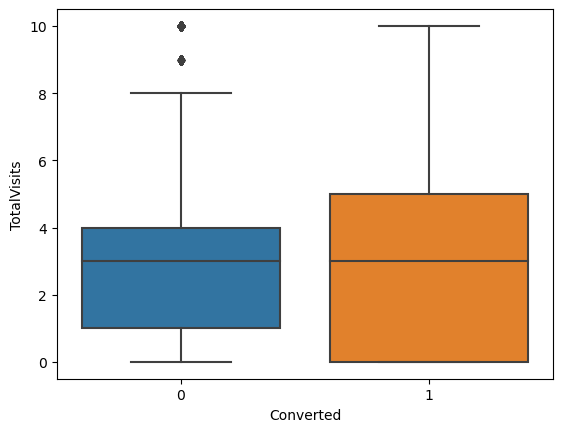

In [51]:
sns.boxplot(data=leads, x="Converted", y='TotalVisits')
plt.show()

#### Observations -
1. There were good amount of outliers, any of the 99th or 95th percentiles data could be taken for further analysis. 
2. Mean of both the converted and non-converted are quite same.

Let's check "Total Time Spent on Website" column in case of any outliers

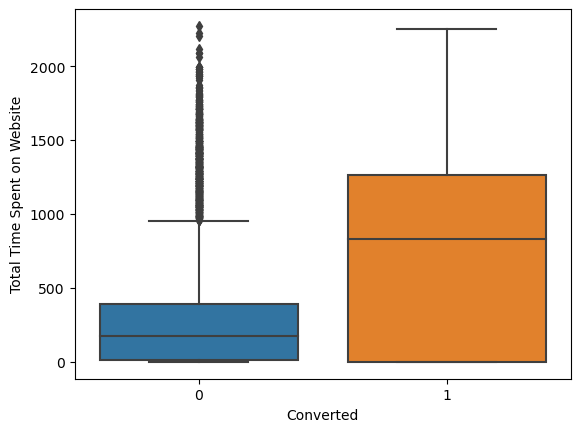

In [52]:
sns.boxplot(data=leads, x="Converted", y='Total Time Spent on Website')
plt.show()

#### Observations -
1. There are good amount of outliers for non-converted leads
2. Also, leads who are spending more time got converted, so wesite of could be more engaging to attract more leads and eventually more conversions

Let's look at the "Page Views Per Visit" attribute

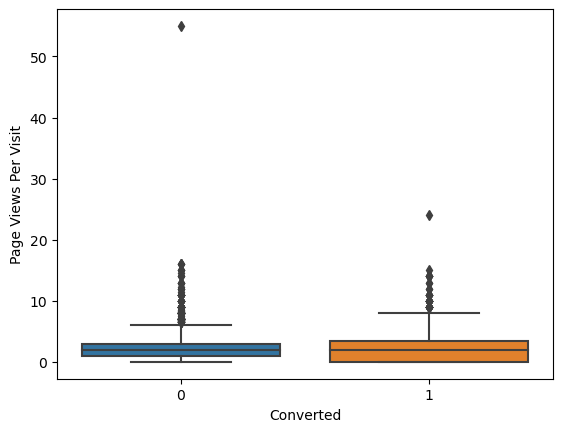

In [53]:
sns.boxplot(data=leads, x="Converted", y='Page Views Per Visit')
plt.show()

There are outliers, we will apply 95th percentile for this as well

In [54]:
quantile = leads['Page Views Per Visit'].quantile([0.05, 0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= quantile[0]] = quantile[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= quantile[1]] = quantile[1]

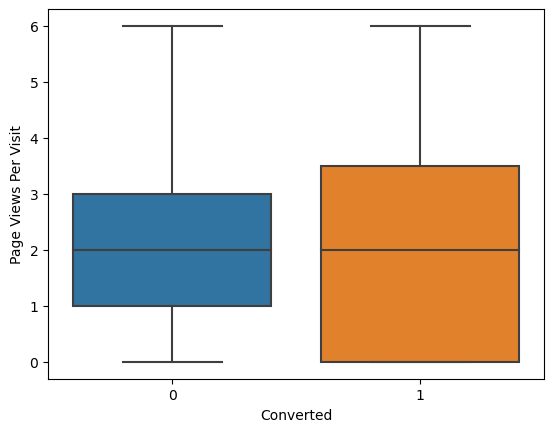

In [55]:
sns.boxplot(data=leads, x="Converted", y='Page Views Per Visit')
plt.show()

#### Observations -
1. Converted and non-converted leads have quite similar mean
2. We cannot infer here that converted leads have visited more pages in compare to non-converted ones

Let's analyse 'Last Activity' column

In [56]:
leads['Last Activity']

0       Page Visited on Website
1                  Email Opened
2                  Email Opened
3                   Unreachable
4             Converted to Lead
                 ...           
9235          Email Marked Spam
9236                   SMS Sent
9237                   SMS Sent
9238                   SMS Sent
9239                   SMS Sent
Name: Last Activity, Length: 9074, dtype: object

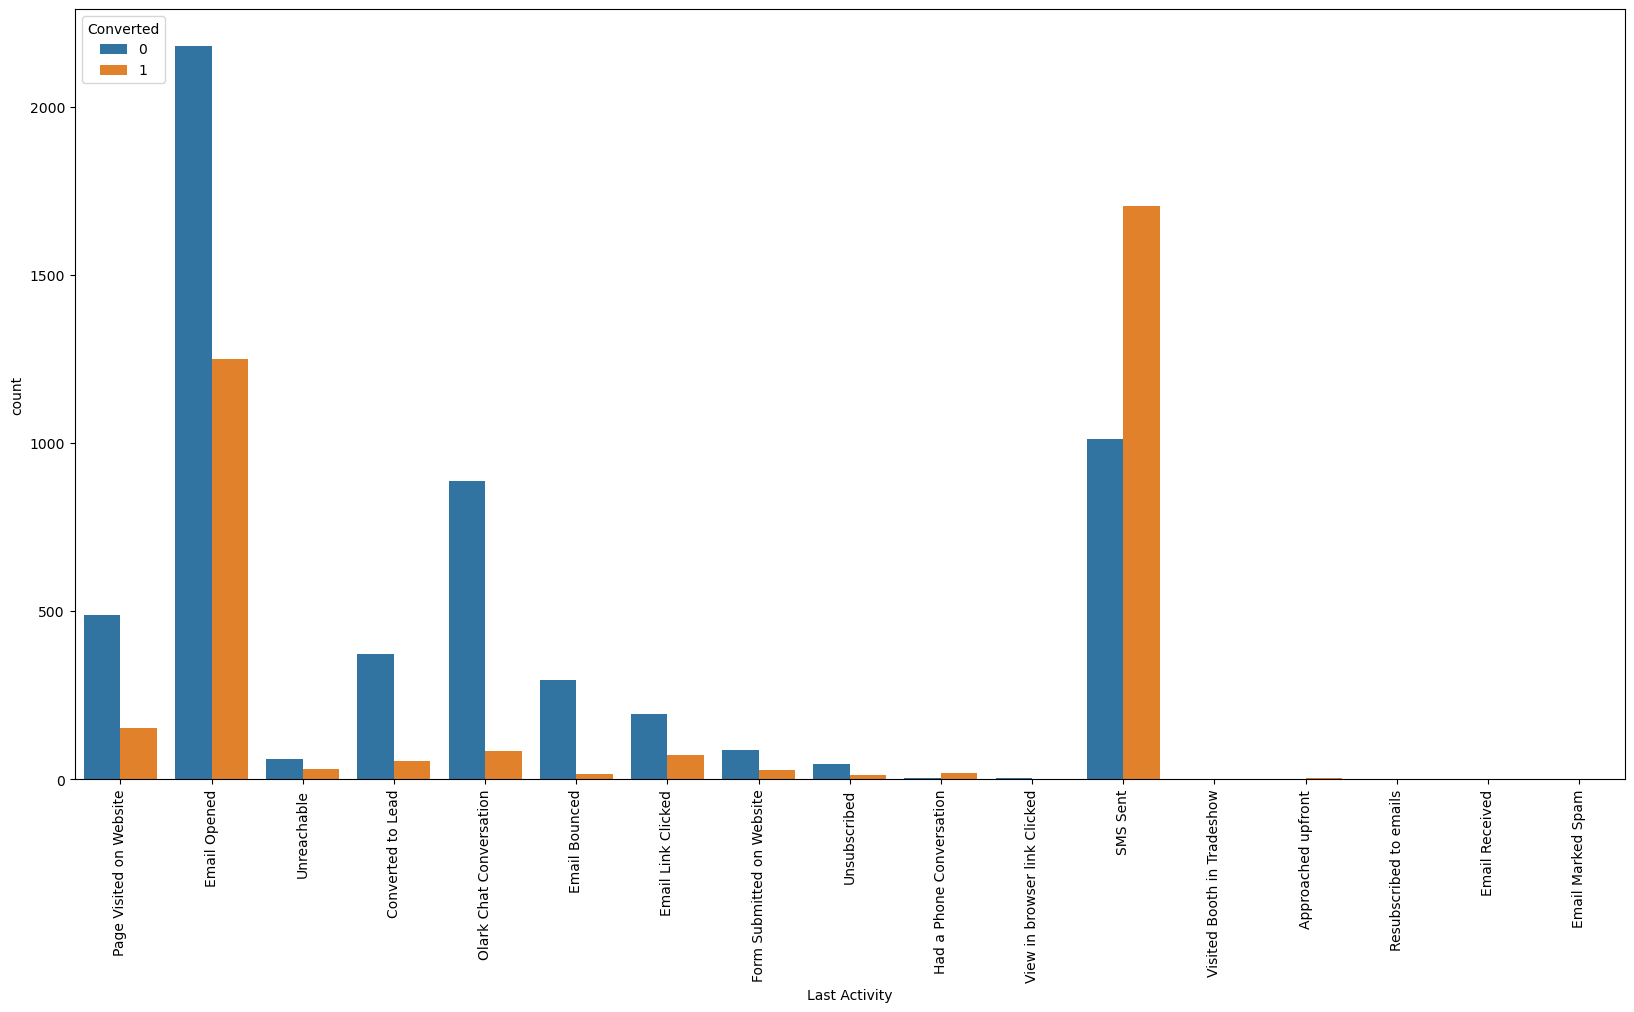

In [57]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'Last Activity', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

#### Observations - 
1. 'SMS Sent' and 'Email Opened' has more conversions than any other
2. 'SMS Sent' has the higher conversion rate
3. We can group the other minor 'Last Activity' attributes to 'Other'

In [58]:
leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [59]:
leads['Last Activity'].replace(['Resubscribed to emails', 'Visited Booth in Tradeshow', 'Email Marked Spam', 
                                'Email Received', 'Approached upfront', 'View in browser link Clicked', 
                                'Had a Phone Conversation',], "Other", inplace = True)

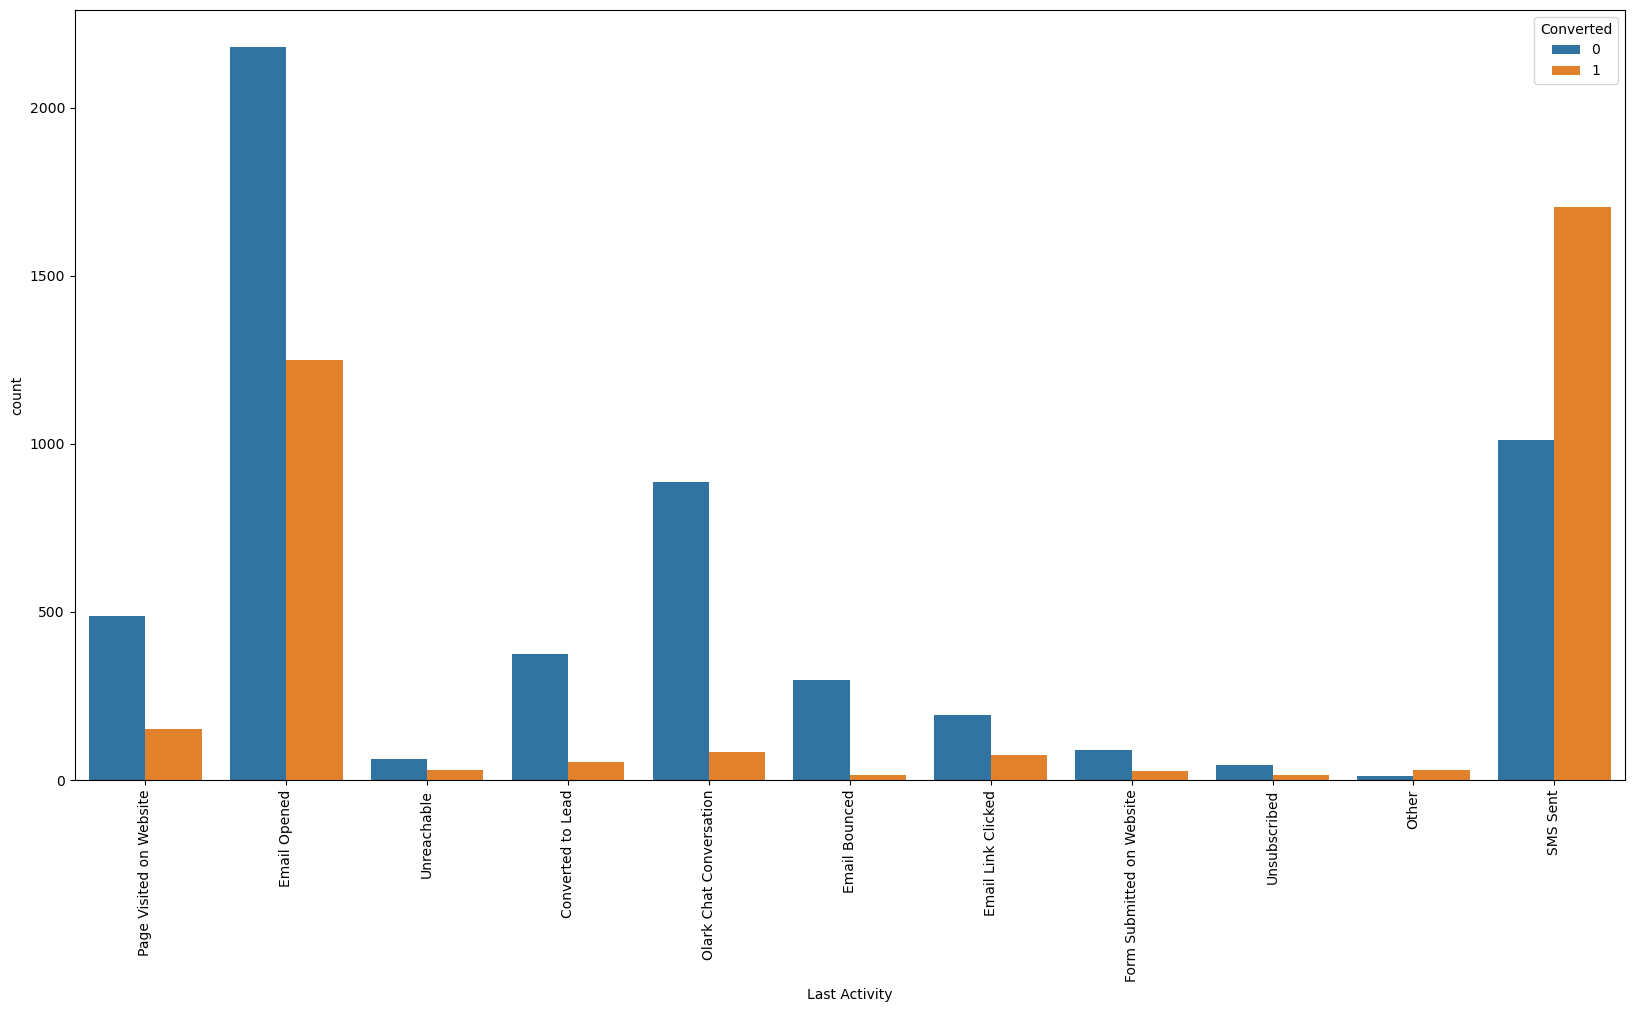

In [60]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'Last Activity', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

#### Observations - 
1. Nothing major changes from the previous observations

Let's check conversions based on Country

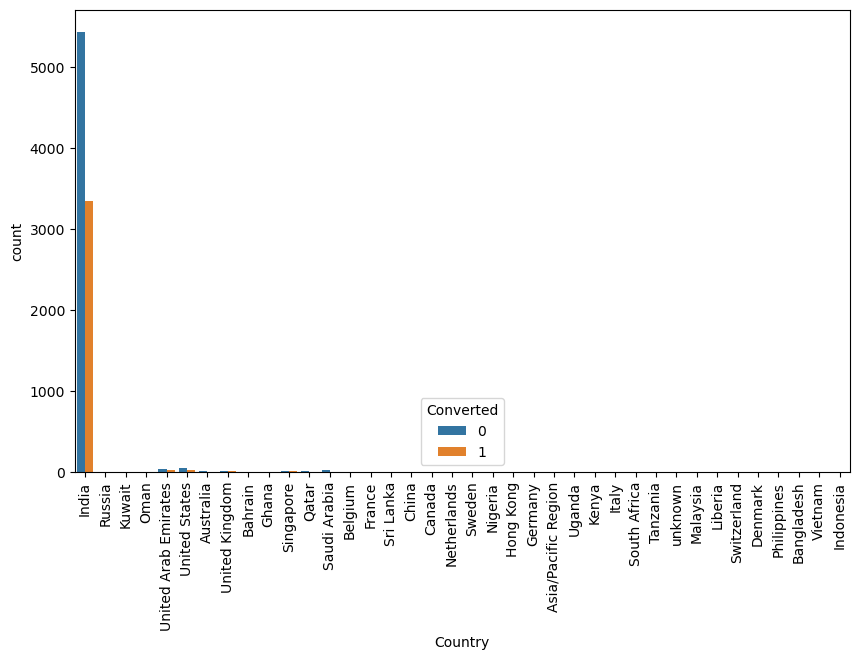

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(data = leads, x = 'Country', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

#### Observations -
Majority of the leads are from India and conversions too

Let's check conversions with specialization

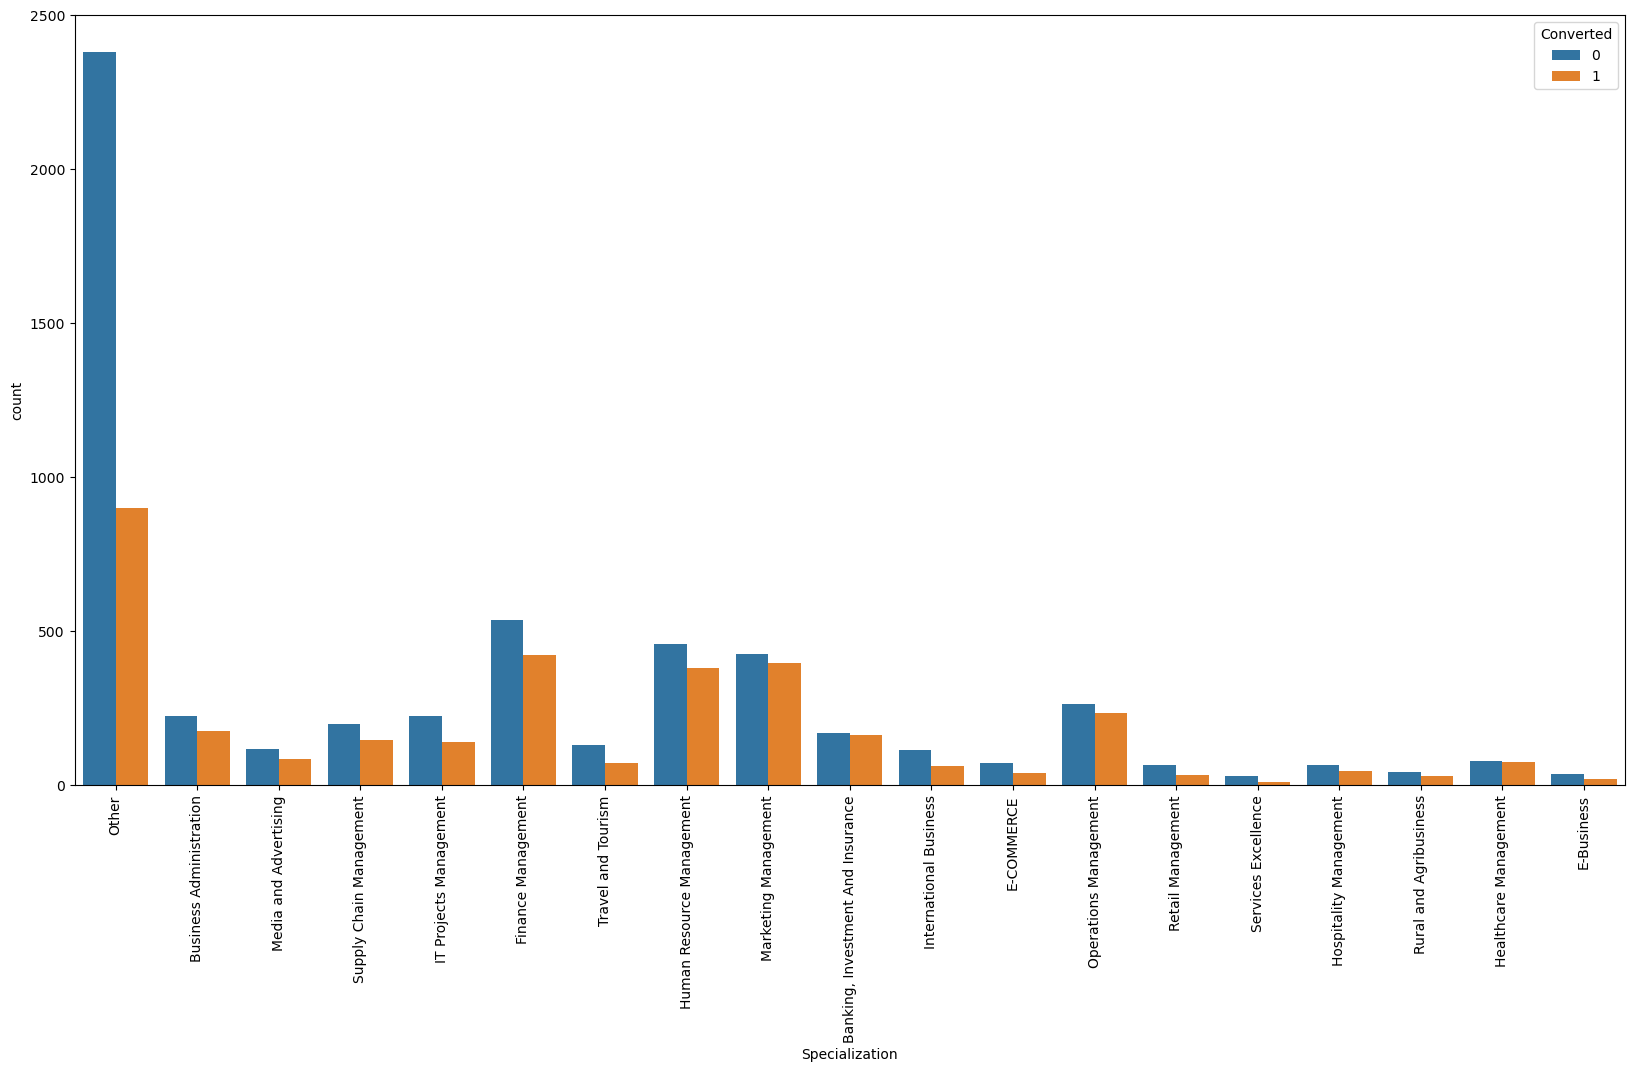

In [66]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'Specialization', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

#### Observations -
1. There are more conversions from Other category, this implies that leads who did not mention their specialization have got more conversions than other specializations
2. Among all the mentioned specializations Marketing Management, Human Resource Management, Finance Management has very good conversion rate as we all numbers.

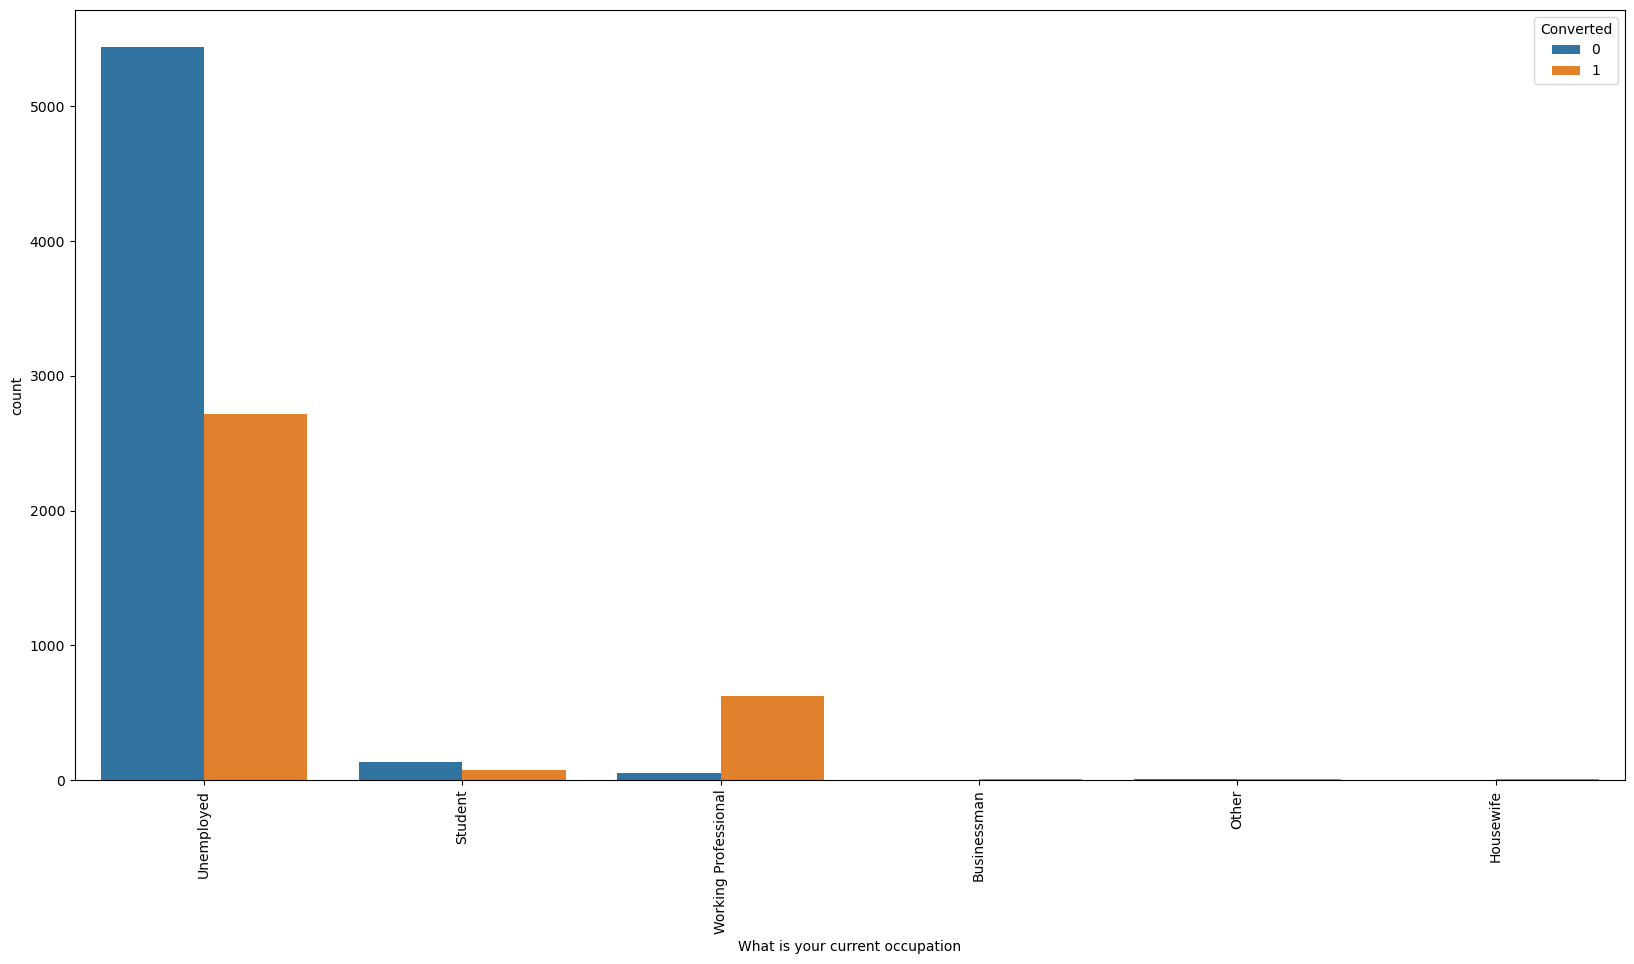

In [70]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'What is your current occupation', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

#### Observations -
1. Unemployed leads have more conversions in numbers - we can infer that unemployed leads are interested in courses to find alternative choices in their career
2. Working professionals have more conversion rate - we can infer that working professionals are interested in courses to upskill themselves. This means working professional have a high chance of joining a course.

In [74]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

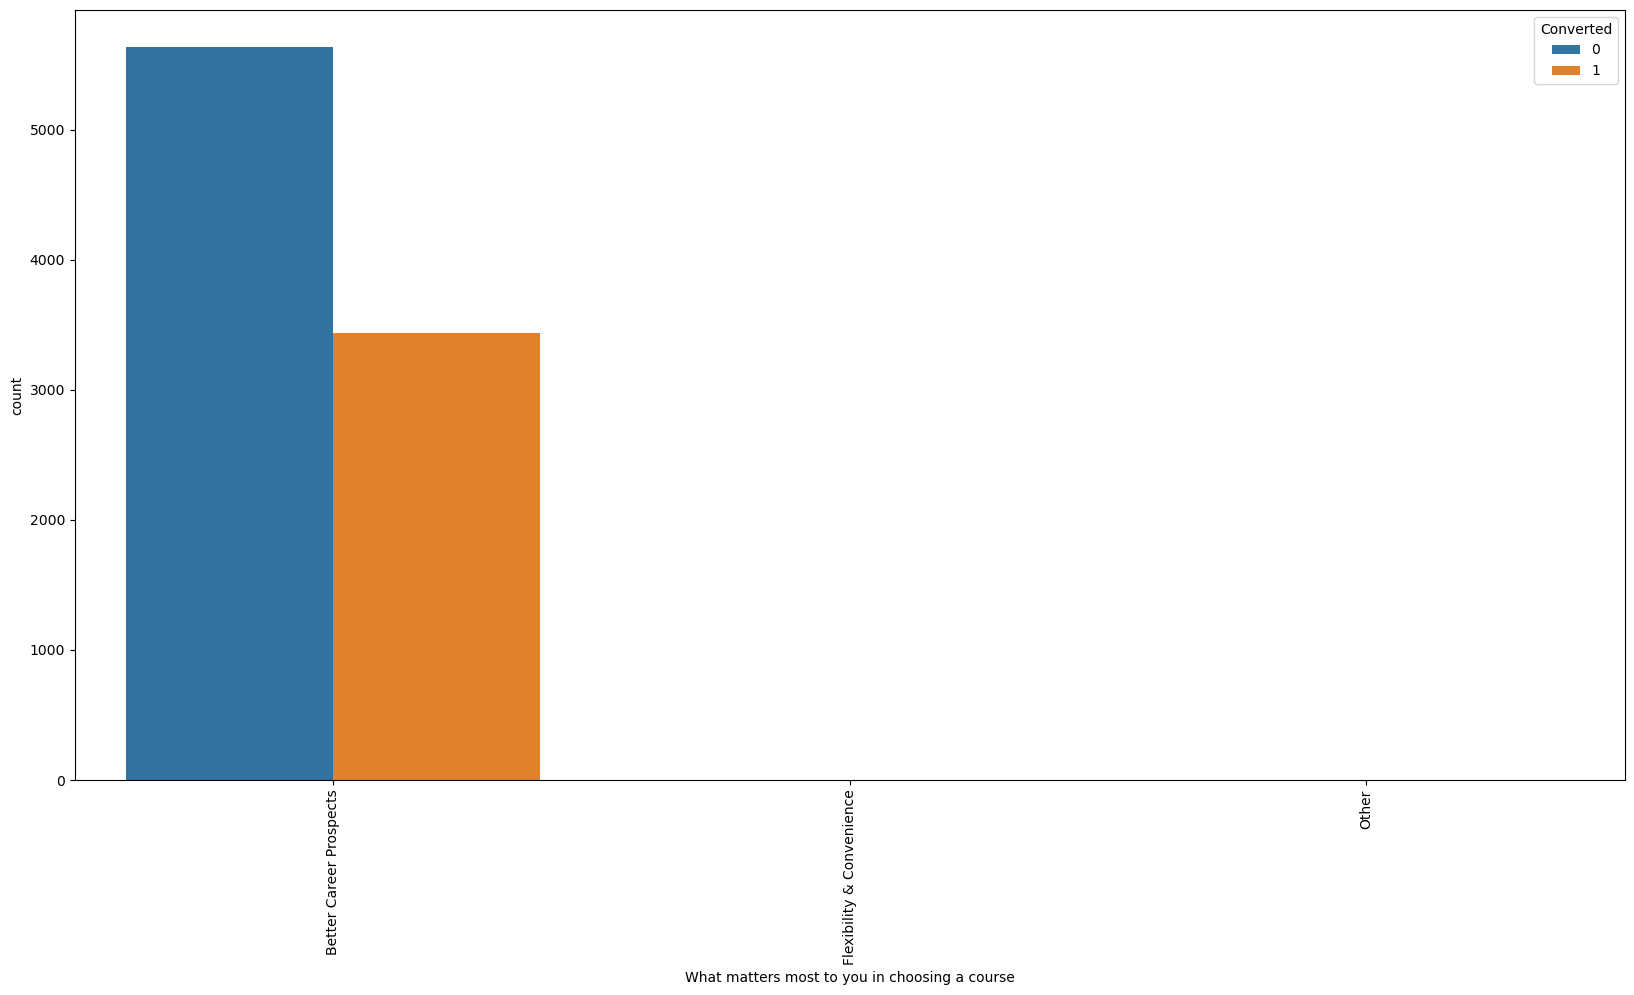

In [75]:
plt.figure(figsize=(20, 10))
sns.countplot(data = leads, x = 'What matters most to you in choosing a course', hue = 'Converted')
plt.xticks(rotation = 90)
plt.show()

#### Observations -
1. Supporting the previous observation, leads have chosen a course for "Better Career Prospect" and have decent conversion.

Let's check all the advertisement attributes and their contributions to the conversions
They are -
1. Search
2. Magazine
3. Newspaper Article
4. X Education Forums
5. Newspaper
6. Digital Advertisement

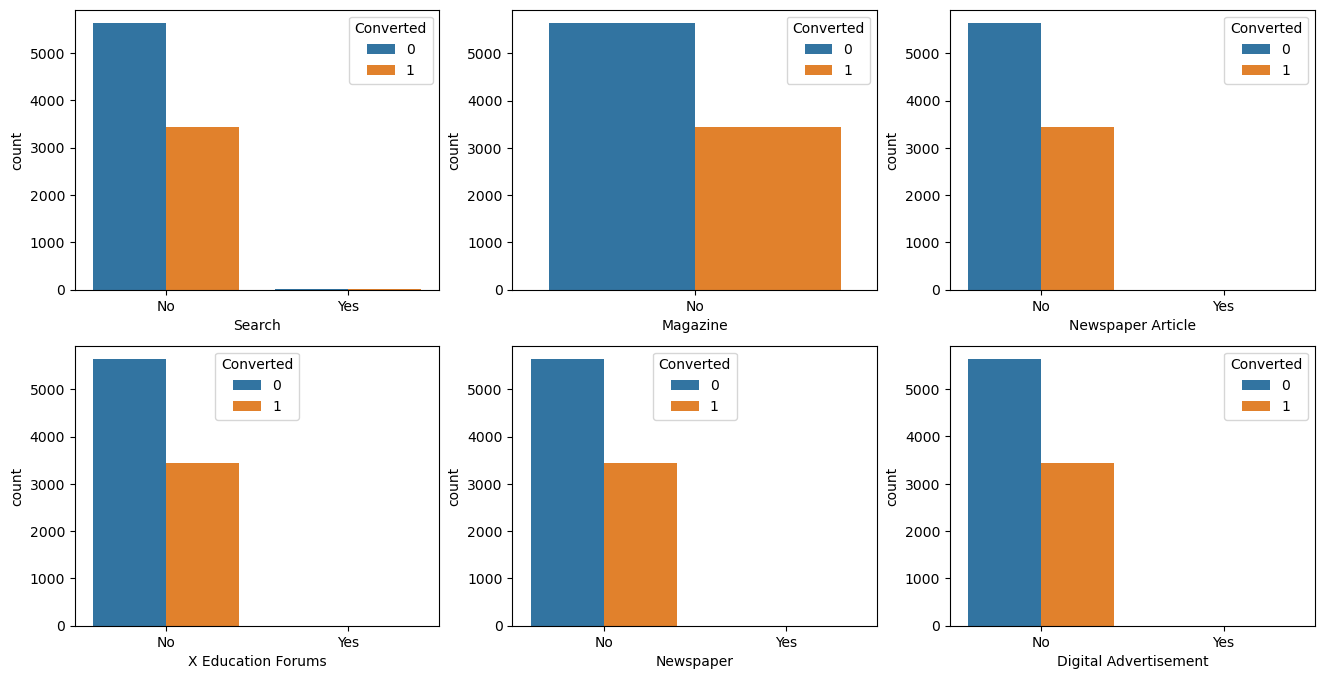

In [79]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))
sns.countplot(data = leads, x = 'Search', hue = 'Converted', ax=axs[0, 0])
sns.countplot(data = leads, x = 'Magazine', hue = 'Converted', ax=axs[0, 1])
sns.countplot(data = leads, x = 'Newspaper Article', hue = 'Converted', ax=axs[0, 2])
sns.countplot(data = leads, x = 'X Education Forums', hue = 'Converted', ax=axs[1, 0])
sns.countplot(data = leads, x = 'Newspaper', hue = 'Converted', ax=axs[1, 1])
sns.countplot(data = leads, x = 'Digital Advertisement', hue = 'Converted', ax=axs[1, 2])
plt.show()

#### Observations -
1. Search has most of the entries as No with decent conversion rate, also it has some Yes(s) which has conversions
2. Magazine have all the values as No - no inference can be drawn from here
3. Newspaper article has most of the entries as No.
4. X Education Forums also has most entries as No.
5. Regular Newspaper has most entries as No.
6. Digital Advertisement has most entries as No.
7. This implies that none of the advertising media for X Education has been effective in lead conversions yet.